In [18]:
#ex6.5 counting duplicate words
# Write a script that uses a dictionary to determine and print the number of duplicate words in a sentence
# (assume no punctuation)

text = 'To bE or NoT to Be tHaT is The qUesTiOn'
text = text.lower()

from collections import Counter
counter = Counter(text.split())
duplicates = {k: v for k, v in counter.items() if v > 1 }
print(f'There are {len(duplicates)} duplicate words in this sentence: {", ".join(list(duplicates.keys()))}')

There are 2 duplicate words in this sentence: to, be


In [27]:
#ex.6.6 duplicate word removal
# write a function that receives a list of words and then displays in alphabetical order only the unique words.
# use a set to get the unique words in the list

text = 'To bE or NoT to Be tHaT is The qUesTiOn'

from collections import Counter

def unique_words(words):
    words = words.lower()
    #first tokenise the words:
    words = words.split()
    #now count the instances of each word and keep only the unique ones
    counter = Counter(words)
    uniques = {k for k, v in counter.items() if v==1}
    uniques = sorted(uniques)
    print(f'The unique words are: {", ".join(uniques)}')


unique_words(text)

The unique words are: dogs, let, out, the


In [35]:
#ex6.7 Character counts
# use techniques similar to fig06_02.py

# text = ('this is sample text with several words ' 
#         'this is more sample text with some different words')
text = 'the quick brown fox jumps over the lazy dog'

char_counts = {}

# count occurrences of each unique character
words = ''.join(text.split())
#print(list(words))

for char in list(words):
    if char in char_counts: 
        char_counts[char] += 1  # update existing key-value pair
    else:
        char_counts[char] = 1  # insert new key-value pair

print(f'{"CHAR":<8}COUNT')

for char, count in sorted(char_counts.items()):
    print(f'{char:<8}{count}')

print('\nNumber of unique characters:', len(char_counts))

CHAR    COUNT
a       1
b       1
c       1
d       1
e       3
f       1
g       1
h       2
i       1
j       1
k       1
l       1
m       1
n       1
o       4
p       1
q       1
r       2
s       1
t       2
u       2
v       1
w       1
x       1
y       1
z       1

Number of unique characters: 26


In [82]:
#ex6.08 writing the word equivalent of a cheque amount (up to €9999.99)
#e.g. 112.43 should be written as 'one hundred twelve and 43/100'

amt = 1214.56

#first separate amount before and after decimal point:
eur = amt//1
cent = int(round(amt%1, 2)*100)

#for ones, hundreds, thousands, use the same dictionary mapping values to words
oht = {1:'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six', 7:'seven', 8:'eight', 9:'nine'}
#for tens, need a different map:
tens = {2:'twenty', 3:'thirty', 4:'forty', 5:'fifty', 6:'sixty', 7:'seventy', 8:'eighty', 9:'ninety'}
#for teens, another map:
teens = {10: 'ten', 11:'eleven', 12:'twelve', 13:'thirteen', 14:'fourteen', 15:'fifteen', 16:'sixteen', 
         17:'seventeen', 18:'eighteen', 19:'nineteen'}

#extract thousands value
k = eur//1000
if k > 0:
    ktext = f'{oht[k]} thousand '
else:
    ktext = ''
#extract hundreds:
c = (eur-(k*1000))//100
if c > 0:
    ctext = f'{oht[c]} hundred '
else:
    ctext = ''
#extract tens and ones:
x = (eur-(k*1000)-(c*100))
if 9 < x < 20:
    xtext = teens[x]
    itext = ''
else:
    x = x//10
    if x > 1:
        xtext = f'{tens[x]} '
    else:
        xtext = ''
    i = (eur-(k*1000)-(c*100)-(x*10))
    itext = oht[i]

text = ''.join([ktext, ctext, xtext, itext, f' and {cent}/100'])
text





'one thousand two hundred fourteen and 56/100'

In [88]:
#ex6.9 dictionary manipuations

tlds = {'Canada':'ca', 'United States':'us', 'Mexico':'mx'}

#1.
print('Canada' in tlds)
#2.
print('France' in tlds)
#3.
print()
for key, value in tlds.items():
    print(f'{key:<15}{value}')
#6.
rtlds = {value:key for key, value in tlds.items()}
print(rtlds)


True
False

Canada         ca
United States  us
Mexico         mx
{'ca': 'Canada', 'us': 'United States', 'mx': 'Mexico'}


In [45]:
#ex 6.11 Analyzing the game of craps
# Modify script from chapter 4 to play 1,000,000 games of craps. 
# Use two dictionaries to track the total number of games won and lost
# on the 1st roll, 2nd roll, etc. 
# Summarise the results as follows 
# (1) % of total games won
# (2) % of total games lost
# (3) % of games won/lost on a given roll
# (4) cumulative % of games won lost up to a given number of rolls

# fig04_02.py
"""Simulating the dice game Craps."""
import random

## My modifications ######################
# import seaborn as sns
# import matplotlib.pyplot as plt

ngames = 1000000
wins = {}
losses = {}
##########################################

def roll_dice():
    """Roll two dice and return their face values as a tuple."""
    die1 = random.randrange(1, 7)
    die2 = random.randrange(1, 7)
    return (die1, die2)  # pack die face values into a tuple

def display_dice(dice):
    """Display one roll of the two dice."""
    die1, die2 = dice  # unpack the tuple into variables die1 and die2
    #print(f'Player rolled {die1} + {die2} = {sum(dice)}')

def play_craps(ngames = 1):
    for i in range(ngames):
        die_values = roll_dice()  # first roll
        display_dice(die_values)

        # determine game status and point, based on first roll
        sum_of_dice = sum(die_values)

        if sum_of_dice in (7, 11):  # win
            game_status = 'WON'
            ## My modifications ####
            if 0 in wins:
                wins[0] += 1
            else:
                wins[0] = 1
            ########################
        elif sum_of_dice in (2, 3, 12):  # lose
            game_status = 'LOST'
            ## My modifications ####
            if 0 in losses:
                losses[0] += 1
            else:
                losses[0] = 1
            ########################
        else:  # remember point
            game_status = 'CONTINUE'
            my_point = sum_of_dice
            #print('Point is', my_point)

        # continue rolling until player wins or loses
        ## My modifications ####
        rolls = 0
        ########################
        while game_status == 'CONTINUE':
            ## My modifications ####
            rolls += 1
            #######################
            die_values = roll_dice()
            display_dice(die_values)
            sum_of_dice = sum(die_values)

            if sum_of_dice == my_point:  # win by making point
                game_status = 'WON'
                ## My modifications ####
                if rolls in wins:
                    wins[rolls] += 1
                else:
                    wins[rolls] = 1
                ########################
            elif sum_of_dice == 7:  # lose by rolling 7
                game_status = 'LOST'
                ## My modifications ####
                if rolls in losses:
                    losses[rolls] += 1
                else:
                    losses[rolls] = 1
                ########################

play_craps(ngames)

#print(f'wins: {wins}')
#print(f'losses: {losses}')

#Display a summary of:
#(1) % games won:
nwins = sum([v for k, v in wins.items()])
print(f'Percentage of games won: {(nwins/ngames):.2%}')
#(2) % of games lost:
nlosses = sum([v for k, v in losses.items()])
print(f'Percentage of games lost: {(nlosses/ngames):.2%}')
#(3) % of games resolved (either won or lost) on each roll:
resol = {}
for i in range(max(max(wins), max(losses))):
    if i in wins and i in losses:
        resol[i] = wins[i] + losses[i]
    elif i in wins:
        resol[i] = wins[i]
    elif i in losses:
        resol[i] = losses[i]
#(4) cumulative % of games resolved (either won or lost) on each roll:
from numpy import cumsum
cumresol = cumsum(list(resol.values()))
cumres = {k:v for k, v in zip(resol.keys(), cumresol)}
print('% of games resolved (won or lost) on each roll')
print(f'roll  % resolved   cumulative %')
for (k1, v1), (k2, v2) in zip(resol.items(), cumres.items()):
    print(f'{k1:<6}{(v1/ngames):>6.2%}{(v2/ngames):>13.2%}')



Percentage of games won: 49.31%
Percentage of games lost: 50.69%
% of games resolved (won or lost) on each roll
roll  % resolved   cumulative %
0     33.30%       33.30%
1     18.84%       52.14%
2     13.46%       65.60%
3      9.67%       75.28%
4      6.93%       82.21%
5      4.99%       87.20%
6      3.57%       90.77%
7      2.56%       93.33%
8      1.86%       95.18%
9      1.34%       96.52%
10     0.97%       97.50%
11     0.69%       98.18%
12     0.50%       98.69%
13     0.36%       99.04%
14     0.25%       99.30%
15     0.19%       99.49%
16     0.13%       99.62%
17     0.10%       99.73%
18     0.07%       99.80%
19     0.06%       99.85%
20     0.04%       99.89%
21     0.03%       99.92%
22     0.02%       99.94%
23     0.02%       99.96%
24     0.01%       99.97%
25     0.01%       99.98%
26     0.01%       99.98%
27     0.00%       99.99%
28     0.00%       99.99%
29     0.00%       99.99%
30     0.00%      100.00%
31     0.00%      100.00%
32     0.00%      100.00

In [11]:
#ex6.13 Synonyms dictionary
#Create a synonyms dictionary that maps three synonyms to each of 5 words (or the Irish irregular verbs)
#Display the dictionary as a key with an indented list of synonyms underneath

dic = {'go':['chuaigh', 'téann', 'rachaidh'],
       'get':['fuair', 'faigheann', 'gheobhaidh'],
       'see':['chonaic', 'feiceann', 'feicfidh'],
       'say':['dúirt', 'deir', 'déarfaidh'],
       'make/do':['rinne', 'déanann', 'déanfaidh'],
       'be':['bhí', 'tá/bíonn', 'beidh']}

for k, v in dic.items():
    print(k)
    for i in v:
        print(f'  {i}')
    


go
  chuaigh
  téann
  rachaidh
get
  fuair
  faigheann
  gheobhaidh
see
  chonaic
  feiceann
  feicfidh
say
  dúirt
  deir
  déarfaidh
make/do
  rinne
  déanann
  déanfaidh
be
  bhí
  tá/bíonn
  beidh


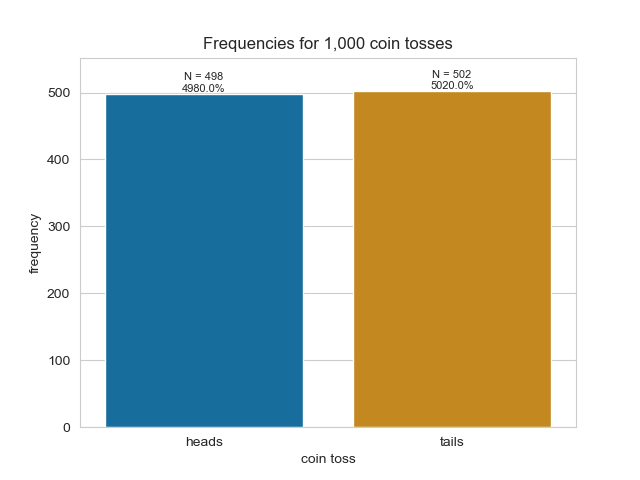

In [29]:
#Ex6.14 Dynamic visualisaition of coin tossing
#Modify the coin tossing simulation from ex5.31 to update the bar plot dynamically as you flip the coin
%matplotlib ipympl

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation

n_per_frame = 10
n_frames = 100


#define the update function 
def update(frame_number, ftosses, fcoin, frequency):
    """Configures bar plot contents for each animation frame."""
    # toss coin and update frequencies
    for i in range(ftosses):
        frequency[random.randrange(2)] += 1

    #reconfigure bar plot for updated frequencies
    plt.cla() #clear current plot
    #new bars
    axes = sns.barplot(x = fcoin, y = frequency, hue = fcoin, palette = 'colorblind', legend = False)
    axes.set_title(f'Frequencies for {sum(frequency):,} coin tosses')
    axes.set(xlabel = "coin toss", ylabel = "frequency", xticklabels = ['heads', 'tails'])

    #add values above bar
    axes.set_ylim(top = max(frequency)*1.1) #scale y axis by 10%
    for bar, freq in zip(axes.patches, frequency):
        text_x = bar.get_x() + bar.get_width()/2
        text_y = bar.get_height()
        text = f'N = {freq}\n{freq/sum(frequency):.1%}'
        axes.text(text_x, text_y, text, fontsize = 8, ha = 'center', va = 'bottom')



#set the title and style
figure = plt.figure('Coin tosses')
sns.set_style('whitegrid')
values = ['heads', 'tails']
frequency = [0, 0]

# configure and start animation that calls function update
coin_animation = animation.FuncAnimation(
    figure, update, repeat=False, frames=n_frames - 1, interval=33,
    fargs=(n_per_frame, values, frequency))

plt.show()  # display window

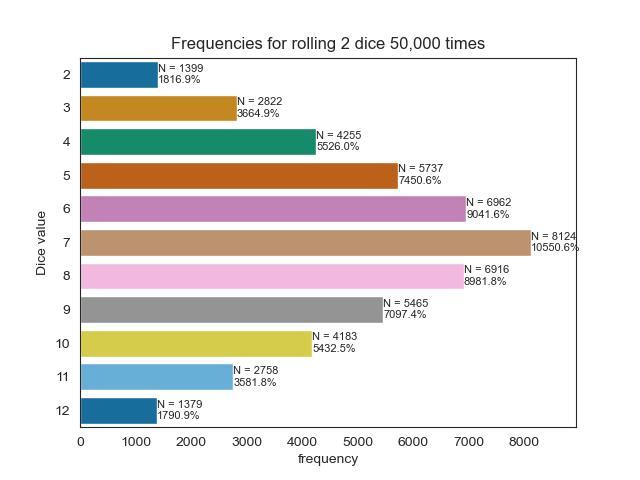

In [37]:
#ex6.15 Dynamic visualisation
#Modify your script from ex.5.32 to update the barplot dynamically as you roll the dice
%matplotlib ipympl

# RollDie.py
"""Graphing frequencies of die rolls with Seaborn."""
import matplotlib.pyplot as plt
import numpy as np
import random 
import seaborn as sns
from matplotlib import animation

n_per_frame = 1000
n_frames = 50

#define the update function
def update(frame_number, frolls, frequency):
    # roll dice and update frequencies
    for i in range(frolls):
        r1 = random.randint(1,6)
        r2 = random.randint(1, 6)
        rsum = r1 + r2
        frequency[rsum] += 1

    values, frequencies = list(frequency.keys()), list(frequency.values())

    #reconfigure bar plot for updated frequencies
    plt.cla() #clear current plot
    #new bars
    axes = sns.barplot(y = values, x = frequencies, hue = values, palette = 'colorblind', legend = False, orient = 'h')
    axes.set_title(f'Frequencies for rolling 2 dice {sum(frequencies):,} times')
    axes.set(ylabel = "Dice value", xlabel = "frequency")

    #add values to right of bar
    axes.set_xlim(right = max(frequencies)*1.1) #scale x axis by 10%
    for bar, freq in zip(axes.patches, frequencies):
        text_y = bar.get_y() + bar.get_height()/2
        text_x = bar.get_width() + 1
        text = f'N = {freq}\n{freq/sum(frequencies):.1%}'
        axes.text(text_x, text_y, text, fontsize = 8, ha = 'left', va = 'center')



#set the title and style
figure = plt.figure('Rolling 2 Six-Sided Dice')
sns.set_style('white')
frequency = {i:0 for i in range(2, 13)}

# configure and start animation that calls function update
coin_animation = animation.FuncAnimation(
    figure, update, repeat=False, frames=n_frames-1, interval=33,
    fargs=(n_per_frame, frequency))

plt.show()  # display window




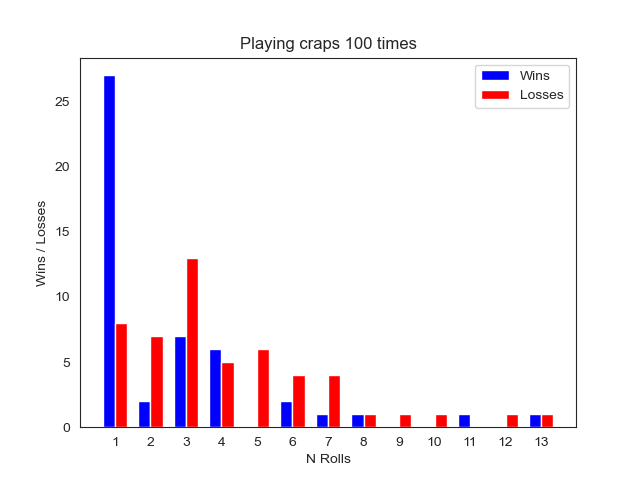

In [45]:
#ex6.16 Dynamic visualisation
# Reimplement your solution to ex5.33 (games of craps) to display a dynamic bar chart
%matplotlib ipympl

"""Simulating the dice game Craps."""
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation

n_frames = 50
n_per_frame = 100

def roll_dice():
    """Roll two dice and return their face values as a tuple."""
    die1 = random.randrange(1, 7)
    die2 = random.randrange(1, 7)
    return (die1, die2)  # pack die face values into a tuple

def display_dice(dice):
    """Display one roll of the two dice."""
    die1, die2 = dice  # unpack the tuple into variables die1 and die2
    #print(f'Player rolled {die1} + {die2} = {sum(dice)}')

def play_craps(ngames):
    for i in range(ngames):
        die_values = roll_dice()  # first roll
        display_dice(die_values)

        # determine game status and point, based on first roll
        sum_of_dice = sum(die_values)

        if sum_of_dice in (7, 11):  # win
            game_status = 'WON'
            ## My modifications ####
            wins[0] += 1
            ########################
        elif sum_of_dice in (2, 3, 12):  # lose
            game_status = 'LOST'
            ## My modifications ####
            losses[0] += 1
            ########################
        else:  # remember point
            game_status = 'CONTINUE'
            my_point = sum_of_dice
            #print('Point is', my_point)

        # continue rolling until player wins or loses
        ## My modifications ####
        rolls = 0
        ########################
        while game_status == 'CONTINUE':
            ## My modifications ####
            if rolls >= 12:
                rolls = 12
            else:
                rolls += 1
            #######################
            die_values = roll_dice()
            display_dice(die_values)
            sum_of_dice = sum(die_values)

            if sum_of_dice == my_point:  # win by making point
                game_status = 'WON'
                ## My modifications ####
                wins[rolls] += 1
                ########################
            elif sum_of_dice == 7:  # lose by rolling 7
                game_status = 'LOST'
                ## My modifications ####
                losses[rolls] += 1
                ########################

        # display "wins" or "loses" message
        # if game_status == 'WON':
        #     print('Player wins')
        # else:
        #     print('Player loses')
                
def update(frame_number, ngames, wins, losses):

    play_craps(ngames)


    #update bar plot
    plt.cla()
    n = (sum(wins) + sum(losses))
    print(n)
    title = f'Playing craps {n} times'
    sns.set_style("white")

    x = range(1, len(wins) + 1)
    width = 0.35  # Set the width of the bars
    plt.bar([i - width/2 for i in x], wins, width, label='Wins', color = 'b')
    plt.bar([i + width/2 for i in x], losses, width, label='Losses', color = 'r')

    plt.xlabel('N Rolls')
    plt.ylabel('Wins / Losses')
    plt.xticks(x)
    plt.title(title)
    plt.legend()

#set the title and style
figure = plt.figure('Wins and losses in the game of Craps')
sns.set_style('white')
wins = [0 for i in range(13)]
losses = [0 for i in range(13)]

# configure and start animation that calls function update
craps_animation = animation.FuncAnimation(
    figure, update, repeat=False, frames=n_frames-1, interval=33,
    fargs=(n_per_frame, wins, losses))

plt.show()  # display window




In [53]:
#ex6.17 Project - cooking with healthier ingredients

#Create a dictionary that maps ingredients to lists of potential replacements
#in preparation for a later exercise (in chapter 'Strings: a deeper look')

replacements = {'1 cup sour cream': '1 cup yoghurt',
                '1 cup milk': '1/2 cup evaporated milk and 1/2 cup water',
                '1 tsp lemon juice': '1/2 tsp vinegar',
                '1 cup sugar': ['1/2 cup honey','1 cup molasses', '1/4 cup agave nectar'],
                '1 cup butter': ['1 cup margarine', '1 cup yoghurt'],
                '1 cup flour': ['1 cup rye flour', '1 cup rice flour'],
                '1 cup mayonnaise': ['1 cup cottage cheese', '1/8 cup mayonnaise and 7/8 cup yoghurt'],
                '1 egg': ['2 tbsb potato flour', '2 tbsp cornstarch', '2 egg whites', '1/2 banana (mashed)'],
                '1 cup milk': '1 cup soy milk',
                '1 cup oil': '1 cup applesauce'}

for key, value in replacements.items():
    print(key)
    if isinstance(value, list):
        for v in value:
            print(f'  - {v}')
    else:
        print(f'  - {value}') #otherwise values that are stings, not lists, will print each character in the string

1 cup sour cream
  - 1 cup yoghurt
1 cup milk
  - 1 cup soy milk
1 tsp lemon juice
  - 1/2 tsp vinegar
1 cup sugar
  - 1/2 cup honey
  - 1 cup molasses
  - 1/4 cup agave nectar
1 cup butter
  - 1 cup margarine
  - 1 cup yoghurt
1 cup flour
  - 1 cup rye flour
  - 1 cup rice flour
1 cup mayonnaise
  - 1 cup cottage cheese
  - 1/8 cup mayonnaise and 7/8 cup yoghurt
1 egg
  - 2 tbsb potato flour
  - 2 tbsp cornstarch
  - 2 egg whites
  - 1/2 banana (mashed)
1 cup oil
  - 1 cup applesauce
